## Natural Language Processing
### Text Preprocessing & Word Counts


##### Libraries used

In [12]:
import pandas as pd 
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sys
import spacy
from wordcloud import WordCloud
import os
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image



##### 1.1 Load the text file

In [13]:
file1 = open("/Users/vaishnaviet/Downloads/Harry Potter Book 1.txt","r",encoding = "utf-8")
mytext = file1.read()

##### 1.2 Tokenize sentences and words

In [14]:
number_of_sentences = sent_tokenize(mytext)
print("No of sentences:",len(number_of_sentences))
print("\n")
number_of_words = word_tokenize(mytext)
print("No of words after word tokenizing:",len(number_of_words))
print("\n")
print(number_of_words[:20])


No of sentences: 6394


No of words after word tokenizing: 98781


['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


##### 1.3 Remove Punctuations

In [15]:
tokenizer = RegexpTokenizer(r'\w+')

mytext_withoutpunc = tokenizer.tokenize(mytext.lower())
# word tokenize and counting
print("# of words after punctuation removing" ' ', len(mytext_withoutpunc))
print("\n")
print(mytext_withoutpunc[:20])


# of words after punctuation removing  80646


['harry', 'potter', 'and', 'the', 'sorcerer', 's', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four']


##### 1.4 Removing stopwords and counting the distinct cleaned words


In [16]:

tokens = [token for token in mytext_withoutpunc if token not in stopwords.words('english')]
print("No of words without stop words:",len(tokens))
print("\n")
freq_dist = nltk.FreqDist(tokens)
print(tokens[:20])
print("\n")
print(freq_dist)

No of words without stop words: 40785


['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']


<FreqDist with 5628 samples and 40785 outcomes>


##### 1.5 Lemmatize the cleaned words

In [17]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in tokens]
lemmatized_words
print("No of words after lemmatizing:", len(lemmatized_words))
freq_dist_1 = nltk.FreqDist(lemmatized_words)
print(freq_dist_1.most_common(20))
print(freq_dist_1)

No of words after lemmatizing: 40785
[('harry', 1327), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 270), ('one', 269), ('back', 264), ('know', 233), ('get', 203), ('got', 199), ('could', 198), ('like', 195), ('see', 181), ('professor', 181), ('snape', 172), ('looked', 169), ('dumbledore', 159), ('go', 145), ('around', 142), ('dudley', 139)]
<FreqDist with 5109 samples and 40785 outcomes>


##### 1.6 Word Distribution

[('harry', 1327), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 270), ('one', 269), ('back', 264), ('know', 233), ('get', 203), ('got', 199), ('could', 198), ('like', 195), ('see', 181), ('professor', 181), ('snape', 172)]


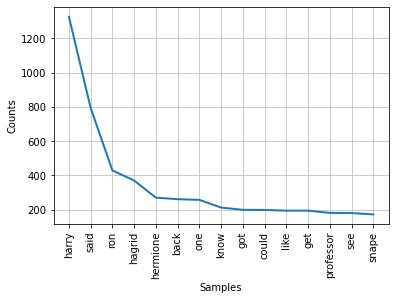

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
print(freq_dist_1.most_common(15))
freq_dist.plot(15)

#### TASK - 2

##### 2.1 Generating word cloud without stopwords

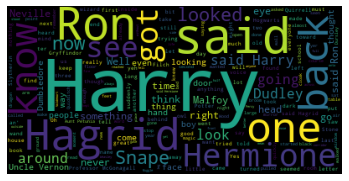

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(mytext)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 2.2 Generating word cloud from processed data in Task-1

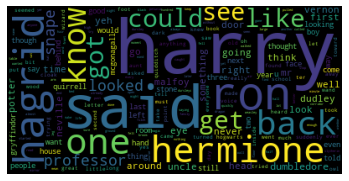

In [20]:
wordcloud_1 = WordCloud().generate_from_frequencies(freq_dist_1)
plt.imshow(wordcloud_1)
plt.axis('off')
plt.show()